# Basic Neural Network
> Maintainer: Huong Nguyen (huong.nguyen@fansipan.io)

- What is Nodes, Layers, Weights, and Bias?
- What is Loss and Accuracy?
- Demo: handwritten digits recognition using Keras

Reference:

[1]. http://neuralnetworksanddeeplearning.com/chap1.html 

[2]. https://medium.com/technology-invention-and-more/how-to-build-a-simple-neural-network-in-9-lines-of-python-code-cc8f23647ca1

[3]. https://fansipanio.github.io/basic-neural-networks/

[4]. https://kharshit.github.io/blog/2018/12/07/loss-vs-accuracy

## 1. What is Nodes, Layers, Weights, and Bias?

To understand these terms, we first explore **what neural network is**.

In my understanding, *neural network is a computing model which is inspired by human brain to solve some elegant problems which ares difficult to achieve by normal programming such as handwritting digit recognization*.

![alt text](https://textimgs.s3.amazonaws.com/boundless-psychology/qjpagvzsrsuts8rmtj4a.jpe)

_(source: https://courses.lumenlearning.com/boundless-psychology/chapter/neurons/)_

Human brain is actually a very complicated system. Neural network is much more simpler, it has some similar characteristics of human brain though. I created a map to show the relationship between the two.

| Characteristic | Human brain | Neural network model |
| --- |---|---|
| The unit| Human brain contains a biliions of **neurons** | Neural network is a net of **nodes** |
| Type of unit | There are three main **types of neurons** including Sensory Neurons, Motor Neurons, and Interneurons  | There are three **type of nodes** differentiating by **layer** consisting of Input layer, Output layer, and Hidden layer|
| How the system works | Basing on a physical and chemical mechanism to decide when an **electrical impulses** occurs | **Weight and Bias** are parameters to decide the correctness of the whole system.|


In reality, it's much more complex. However, I want to show you how neural network modelizes the human brain.

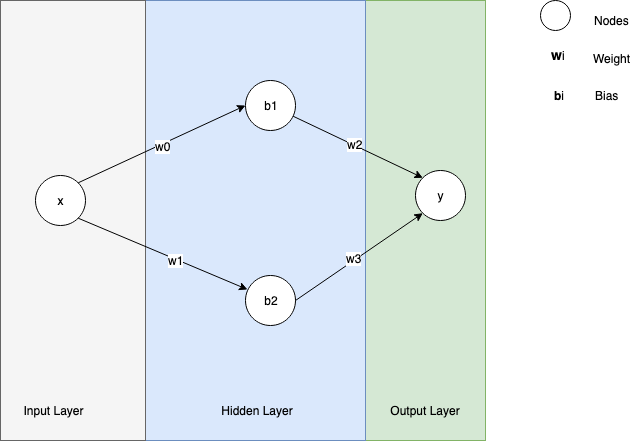




## 2. What is Loss and Accuracy?

Let's explore **what exactly neural network is** in terms of a computing model.

The neural network model is simply understood as a polynomial `f`:

<center>$y = f(x)$</center>

which `x` is input set and `y` is output set (aka label set). The form of `f(x)` is as follow:

<center>$f(x) = w_nx^n + w_{n-1}x^{n-1} + ... + w1x + B$</center>

As you can see, the weight $W = [w_n,w_{n-1},..., w1]$ is a matrix and $B$ is bias. Finding a neural network model is to find the polynomial `f(x)` from provided two set `x` and `y`. Also, we have $y = f(x)$. Therefore, finding `f(x)` is actually to find W and B.

Now, you understand what W and B means.

<center>***</center>

The next question is **how to find the model.** 

Firstly, we randomize W and B.

Secondly, we perform a process called **propagation** which is to run the initiated model with randomized parameters (W, B) to **generate an output $y'$**.

Thirdly, in order to know how good the model is, we need to compare the generated output `y'` and the actual output `y` (labels set). How do we compare?
That is where a **loss/error** function come into play. If the result of the error function is more small, that means the model is more optimal and vice versa.

Finally, basing on the error function, we adjust W and B to make the model more optimal by a process called **backpropagation**.

Both processes *propagation* and *backpropagation* is called **training** process. To measure the performance (how good the model is), we can also apply some metrics. The most metric used is **accuracy**.

<center>***</center>

What is different **Loss and Accuracy**?

**Loss** is defined as the difference between the predicted value by your model and the true value. The most common loss function used in deep neural networks is cross-entropy [4]. For example:
<center>$ E = {1 \above{1pt} 2}(y' - y)^2$</center>

**Accuracy** is one of the metrics to measure the performance of your model [4].

<center>$A = {number \ of\ correct\ predictions\ \above{1pt} total\ number\ of\ predictions}$</center>

## 3. Demo: Handwritten digits recognition using Keras
- prepare dataset
- create model
- train

x_train.shape: (60000, 28, 28)
y_train.shape: (60000,)


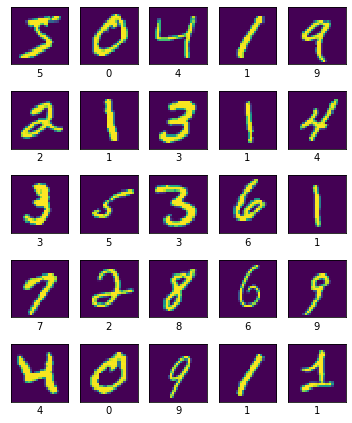

Train on 60000 samples, validate on 10000 samples
Epoch 1/50
60000/60000 [==============================] - 1s 15us/step - loss: 0.1180 - acc: 0.4054 - val_loss: 0.0864 - val_acc: 0.5655
Epoch 2/50
60000/60000 [==============================] - 1s 13us/step - loss: 0.0779 - acc: 0.6076 - val_loss: 0.0695 - val_acc: 0.6503
Epoch 3/50
60000/60000 [==============================] - 1s 12us/step - loss: 0.0621 - acc: 0.6873 - val_loss: 0.0598 - val_acc: 0.6989
Epoch 4/50
60000/60000 [==============================] - 1s 12us/step - loss: 0.0583 - acc: 0.7068 - val_loss: 0.0588 - val_acc: 0.7042
Epoch 5/50
60000/60000 [==============================] - 1s 13us/step - loss: 0.0569 - acc: 0.7141 - val_loss: 0.0564 - val_acc: 0.7166
Epoch 6/50
60000/60000 [==============================] - 1s 12us/step - loss: 0.0548 - acc: 0.7246 - val_loss: 0.0532 - val_acc: 0.7326
Epoch 7/50
60000/60000 [==============================] - 1s 12us/step - loss: 0.0537 - acc: 0.7297 - val_loss: 0.0520 - val_acc

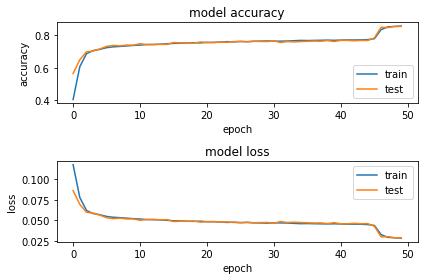

In [19]:


from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Flatten, Dense
from keras.losses import mean_squared_error, categorical_crossentropy
from keras.optimizers import SGD
from keras.utils import to_categorical


import matplotlib.pyplot as plt

# 1. load existing dataset MNIST
# x_train: input set
# y_train: output set (label set)
# x_test, y_test: input & output set which are used for cross validation
(x_train, y_train), (x_test, y_test) = mnist.load_data()
print('x_train.shape:', x_train.shape)
print('y_train.shape:', y_train.shape)

# plot firt 25 images from loaded dataset
plt.figure(figsize=(6,7.5))
for i in range(25):
  plt.subplot(5, 5, i+1)
  plt.xticks([])
  plt.yticks([])
  plt.xlabel(y_train[i])
  plt.imshow(x_train[i])
plt.show()

# 2. create model with 3 layer
# `activation` functions are used for producing the predicted output in propagation process
model = Sequential()
model.add(Flatten(input_shape=(28, 28)))
model.add(Dense(128, activation='relu')) # 128 nodes in hidden layers
model.add(Dense(10, activation='softmax')) # 10 = size([0, 1, 2, ..., 9])

# `optimizer` with `lr` (learning rate) and `loss` function are used for adjusting weight and bias
# in backpropagation process. As well, `accuracy` is a metric to measure peformance of model during training process
model.compile(optimizer=SGD(lr=0.3), loss=mean_squared_error, metrics=['accuracy'])

# 3. start to train
# 1 epoch = 1 training time = 1 propagation + 1 backpropagation
# batch size = training set size/number of inputs in a batch
# validation_data: applying cross-validation technique
history = model.fit(x_train, to_categorical(y_train, 10), batch_size=1000, epochs=50, validation_data=(x_test, to_categorical(y_test, 10)))

# plot training history
fig = plt.figure()
plt.subplot(2,1,1)
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='lower right')

plt.subplot(2,1,2)
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])

plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper right')

plt.tight_layout()

plt.show()